In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr=pd.read_csv(r"C:\Users\HP\Documents\Data Science\Data Set\HR_comma_sep.csv")

In [3]:
hr.shape

(14999, 10)

In [4]:
# removing the duplicates at row level
duplicated=hr.duplicated()
print(sum(duplicated==True))
print(sum(duplicated==False))

3008
11991


In [5]:
hr_dup=hr[duplicated==True]
hr1=hr[duplicated==False]

In [6]:
print(hr_dup.shape,hr1.shape)

(3008, 10) (11991, 10)


In [7]:
hr_dup.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


### Data Attributes
> satisfaction_level: Employee satisfaction level <br>
> last_evaluation: Last evaluation  <br>
> number_project: Number of projects  <br>
> average_montly_hours: Average monthly hours <br>
> time_spend_company: Time spent at the company <br>
> Work_accident: Whether they have had a work accident <br>
> promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
> department: Department <br>
> salary: Salary <br>
> left: Whether the employee has left <br>

In [8]:
# Producing the summary statstics for both numerical and categorical variables
hr1.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


# Intial Insights:
1. number of projects are ranges from 2 to 7
2. on average every one are doing 3.8 projects
3. 25% of employees are doing more than 5 projects
4. min time spend of a company 2 hours
5. 75% of employees are spending max of 4 years
6. on average satisifaction of all the employees are 62%
7. on an average monthly spend hours are 200
8. min average monthly time spend hours are 96

In [9]:
hr1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [10]:
hr1["salary"].value_counts()/len(hr1)*100

low       47.869235
medium    43.874573
high       8.256192
Name: salary, dtype: float64

In [11]:
hr1['Departments '].value_counts()/len(hr1)*100


sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: Departments , dtype: float64

In [12]:
hr1["Work_accident"].value_counts()/len(hr1)*100

0    84.571762
1    15.428238
Name: Work_accident, dtype: float64

In [13]:
hr1["left"].value_counts()/len(hr1)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

In [14]:
# Checking for the missing values in the data
def miss_identify(data):                               
    return data.isnull().sum()/len(data)*100

In [15]:
miss_identify(hr1)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Departments              0.0
salary                   0.0
dtype: float64

In [16]:
hr1['average_montly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [17]:
# Finding range of outliers
iqr=hr1['average_montly_hours'].quantile(0.75)-hr1['average_montly_hours'].quantile(0.25)
lo=hr1['average_montly_hours'].quantile(0.25)-3*iqr
uo=hr1['average_montly_hours'].quantile(0.75)+3*iqr
print("lower outlier cut of point ****",lo," ","upper cut of point ****",uo)
print("min value",hr1['average_montly_hours'].min(),"max value",hr1['average_montly_hours'].max())

lower outlier cut of point **** -101.0   upper cut of point **** 501.0
min value 96 max value 310


In [18]:
hr1["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [19]:
pd.pivot_table(index="left",aggfunc={"left":len},data=hr1)

,left
left,
0,10000
1,1991


In [20]:
hr1.groupby("left")["satisfaction_level"].count()

left
0    10000
1     1991
Name: satisfaction_level, dtype: int64

In [21]:
# How many employees are leaving the company
abc=pd.DataFrame(hr1["left"].value_counts())

In [22]:
abc

,left
0,10000
1,1991


In [23]:
salary_count = hr1[['salary', 'left']].groupby(['salary', 'left']).size()

In [24]:
salary_count

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
dtype: int64

In [25]:
pd.pivot_table(index="salary",columns="left",aggfunc={"left":len},data=hr1)

left      
left       0     1
salary            
high     942    48
low     4566  1174
medium  4492   769

In [26]:
pd.pivot_table(index=["salary","left"],aggfunc={"left":len},data=hr1)

left
salary left      
high   0      942
       1       48
low    0     4566
       1     1174
medium 0     4492
       1      769

In [27]:
salary_count.groupby(level=[0])

In [28]:
salary_count = hr1[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
salary_percent

,salary,left,0
0,high,0,0.951515
1,high,1,0.048485
2,low,0,0.795470
3,low,1,0.204530
4,medium,0,0.853830
5,medium,1,0.146170


In [29]:
pd.crosstab(hr1["salary"],hr1["left"])/len(hr1)

left,0,1
salary,,
high,0.078559,0.004003
low,0.380786,0.097907
medium,0.374614,0.064131


In [30]:
hr1.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [31]:
dept_count = hr1[['Departments ', 'left']].groupby(['Departments ', 'left']).size()
dept_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_percent

,Departments,left,0
0,IT,0,0.838115
1,IT,1,0.161885
2,RandD,0,0.877522
3,RandD,1,0.122478
4,accounting,0,0.824477
5,accounting,1,0.175523
6,hr,0,0.811980
7,hr,1,0.188020
8,management,0,0.880734
9,management,1,0.119266


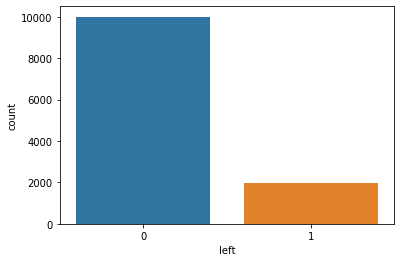

In [32]:
sns.countplot(hr1["left"])

In [33]:
abc=hr1["left"].value_counts()

In [34]:
abc.index

Int64Index([0, 1], dtype='int64')

In [35]:
abc.values

array([10000,  1991], dtype=int64)

<BarContainer object of 2 artists>

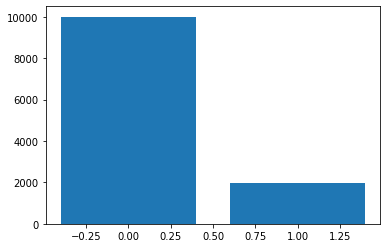

In [36]:
plt.bar(abc.index,abc.values)

In [37]:
work_accd_count = hr1[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()

In [38]:
work_accd_count

,Work_accident,left,0
0,0,0,8255
1,0,1,1886
2,1,0,1745
3,1,1,105


In [39]:
work_accident_count = hr1[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
work_accident_percent

,Work_accident,left,0
0,0,0,0.814022
1,0,1,0.185978
2,1,0,0.943243
3,1,1,0.056757


In [40]:
work_accident_percent.columns

Index(['Work_accident', 'left', 0], dtype='object')

In [41]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

C:\Users\HP\.conda\envs\Data Science\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\.conda\envs\Data Science\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


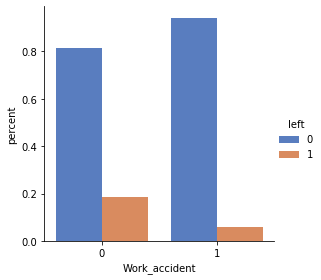

In [42]:
sns.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

In [43]:
hr1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

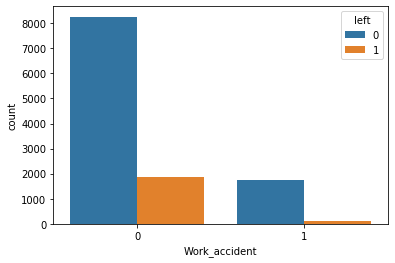

In [44]:
sns.countplot(hr1["Work_accident"],hue=hr1["left"])

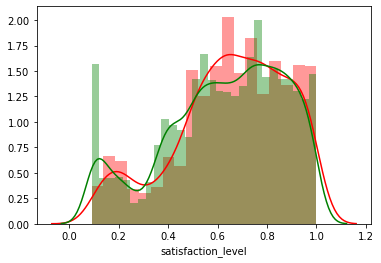

In [45]:
#3. How work accidents have impacted the statisfaction level of the empolyees?
sns.distplot(hr1[hr1.Work_accident == 1]['satisfaction_level'], color = 'r')
sns.distplot(hr1[hr1.Work_accident == 0]['satisfaction_level'], color = 'g')

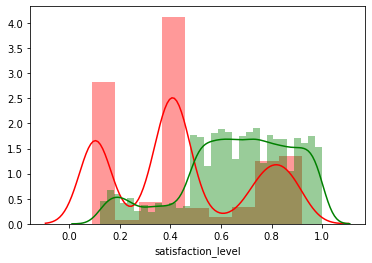

In [46]:
#3. How churn have impacted the statisfaction level of the empolyees?
sns.distplot(hr1[hr1.left == 1]['satisfaction_level'], color = 'r')
sns.distplot(hr1[hr1.left == 0]['satisfaction_level'], color = 'g')

**Hypothesis Testing** <br>
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying 

In [47]:
from scipy import stats

In [48]:
stats.ttest_ind(hr1[hr1.left == 1]['satisfaction_level'], hr1[hr1.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-40.98502015841721, pvalue=0.0)

In [49]:
time_spent_count = hr1[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spent_percent = time_spent_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()

In [50]:
time_spent_percent

,time_spend_company,left,0
0,2,0,0.989347
1,2,1,0.010653
2,3,0,0.831599
3,3,1,0.168401
4,4,0,0.753117
5,4,1,0.246883
6,5,0,0.546139
7,5,1,0.453861
8,6,0,0.798893
9,6,1,0.201107
